In [72]:
"""Runs an XFOIL analysis for a given airfoil and flow conditions"""
import os
import subprocess
import numpy as np

# %% Inputs

airfoil_name = "NACA0012"
alpha_i = 0
alpha_f = 10
alpha_step = 0.25
Re = 1000000
n_iter = 200

# %% XFOIL input file writer 

if os.path.exists("polar_file.txt"):
    os.remove("polar_file.txt")

input_file = open("input_file.in", 'w')
input_file.write("LOAD {0}.dat\n".format(airfoil_name))
input_file.write(airfoil_name + '\n')
input_file.write("PANE\n")
input_file.write("OPER\n")
input_file.write("Visc {0}\n".format(Re))
input_file.write("PACC\n")
input_file.write("polar_file.txt\n\n")
input_file.write("ITER {0}\n".format(n_iter))
input_file.write("ASeq {0} {1} {2}\n".format(alpha_i, alpha_f,
                                             alpha_step))
input_file.write("\n\n")
input_file.write("quit\n")
input_file.close()

subprocess.call("xfoil.exe < input_file.in", shell=True)

polar_data = np.loadtxt("polar_file.txt", skiprows=12)

In [73]:
data = {
    'alpha': [],
    'CL': [],
    'CD': [],
    'CDp': [],
    'CM': [],
    'Top_Xtr': [],
    'Bot_Xtr': []
}
# Open the file
with open('polar_file.txt', 'r') as file:
  # Read each line in the file
  for line in file:
    # Split the line into words
    words = line.split()
    # Check if the line contains numerical data
    if len(words) == 7 and all(word.replace('.', '').isdigit() for word in words[1:]):
      # Extract the numerical data and convert to float
      alpha, CL, CD, CDp, CM, Top_Xtr, Bot_Xtr = map(float, words)
      # Append the data to the dictionary
      data['alpha'].append(alpha)
      data['CL'].append(CL)
      data['CD'].append(CD)
      data['CDp'].append(CDp)
      data['CM'].append(CM)
      data['Top_Xtr'].append(Top_Xtr)
      data['Bot_Xtr'].append(Bot_Xtr)

print(data)

{'alpha': [0.25, 0.5, 0.75, 1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 9.0, 9.25, 9.5, 9.75, 10.0], 'CL': [0.0269, 0.0538, 0.0806, 0.1075, 0.1611, 0.1878, 0.2144, 0.2411, 0.2675, 0.2938, 0.3202, 0.3462, 0.373, 0.4005, 0.4277, 0.4588, 0.4903, 0.5214, 0.5571, 0.5925, 0.9948, 1.016, 1.0357, 1.0584, 1.0808], 'CD': [0.0054, 0.00543, 0.00545, 0.00549, 0.00562, 0.0057, 0.00581, 0.00592, 0.00607, 0.00623, 0.0064, 0.00659, 0.00681, 0.00704, 0.00728, 0.00757, 0.00786, 0.00815, 0.00848, 0.00879, 0.01342, 0.01379, 0.01433, 0.01463, 0.01499], 'CDp': [0.00115, 0.00116, 0.00118, 0.00122, 0.00131, 0.00137, 0.00144, 0.00151, 0.0016, 0.0017, 0.0018, 0.00191, 0.00204, 0.00217, 0.00232, 0.00248, 0.00265, 0.00284, 0.00305, 0.00326, 0.00748, 0.00786, 0.00841, 0.00875, 0.00913], 'CM': [0.0003, 0.0007, 0.001, 0.0014, 0.0021, 0.0025, 0.003, 0.0034, 0.0038, 0.0043, 0.0048, 0.0053, 0.0057, 0.0058, 0.0061, 0.0053, 0.0045, 0.0038, 0.0019, 0.0002, 0.001, 0.0021, 0.0

In [74]:
import numpy as np

def modify_naca_airfoil(filename, new_thickness, new_camber):
  """
  Modify NACA airfoil coordinates in a .dat file based on new thickness and camber parameters.
    
  Parameters:
      filename (str): Path to the .dat file containing NACA airfoil coordinates.
      new_thickness (float): New maximum thickness as a fraction of chord length (0.01 to 0.99).
      new_camber (float): New maximum camber as a fraction of chord length (0.0 to 0.05).
    
  Returns:
      numpy.ndarray: Modified NACA airfoil coordinates (x, y).
  """
  # Read existing airfoil coordinates from the .dat file
  airfoil_coords = np.loadtxt(filename)
    
  # Scale coordinates based on new thickness and camber parameters
  x = airfoil_coords[:, 0]
  y = airfoil_coords[:, 1]
  x_scaled = x
  y_scaled = y * (new_thickness / 0.12)  # Scale thickness
  y_scaled += (new_camber / 0.02) * 0.12 * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x ** 2 + 0.2843 * x ** 3 - 0.1015 * x ** 4)  # Scale camber
    
  # Combine scaled coordinates into a new array
  modified_airfoil_coords = np.column_stack([x_scaled, y_scaled])
    
  # Save modified airfoil coordinates to a new .dat file
  modified_filename = f"modified_{filename}"
  np.savetxt(modified_filename, modified_airfoil_coords, fmt='%1.6f', delimiter='\t')#, header=f"Modified Airfoil: {filename}", comments='')
    
  return modified_airfoil_coords

# Example usage
filename = "NACA0012.dat"
new_thickness = 0.13  # New maximum thickness as a fraction of chord length
new_camber = 0.03     # New maximum camber as a fraction of chord length

# Modify NACA airfoil coordinates and save to a new .dat file
modified_airfoil_coords = modify_naca_airfoil(filename, new_thickness, new_camber)

print(f"Modified airfoil coordinates saved to modified_{filename}")


Modified airfoil coordinates saved to modified_NACA0012.dat


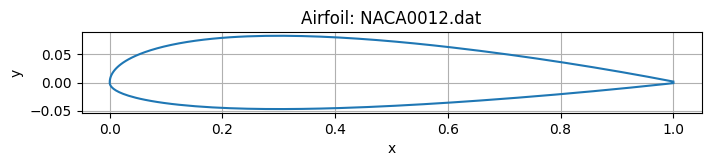

In [75]:
# Initialize lists to store x and y coordinates
import matplotlib.pyplot as plt
# x_coords = []
# y_coords = []
# filename = 'modified_NACA0012.dat'
# # Read the file line by line
# with open(filename, 'r') as file:
    # # Iterate over each line in the file
    # for line in file:
        # # Split the line into x and y coordinates
        # x, y = map(float, line.split())
        # # Append the coordinates to the respective lists
        # x_coords.append(x)
        # y_coords.append(y)
x_coords,y_coords = modified_airfoil_coords[:,0],modified_airfoil_coords[:,1]
# Print the extracted coordinates
# print("X coordinates:", x_coords)
# print("Y coordinates:", y_coords)

plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Airfoil: {filename}')
plt.grid(True)
plt.show()

In [76]:
import numpy as np

# Example input data (replace with your actual data)
x = [1, 2, 3, 4, 5]
y = [2.1, 3.9, 7.1, 10.8, 17.2]

# Degree of the polynomial fit
degree = 2

# Perform polynomial fit
coefficients = np.polyfit(x, y, degree)

# Print the coefficients
print("Coefficients:", coefficients)
# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Evaluate the polynomial function at a specific x value
x_value = 2.5
y_value = poly_function(x_value)
print("Value at x =", x_value, ":", y_value)


Coefficients: [ 0.69285714 -0.44714286  1.94      ]
Value at x = 2.5 : 5.152500000000008


In [77]:
def LiftDragRatio(polar_input_dict):
  alpha = polar_input_dict['alpha']
  cl = polar_input_dict['CL']
  cd = polar_input_dict['CD']
  lift_over_drag_discrete = []
  for index in range(len(cl)):
    lift_over_drag_discrete.append(cl[index]/cd[index])
  polyfit_coeffiecients = np.polyfit(alpha,lift_over_drag_discrete,5)
  return np.poly1d(polyfit_coeffiecients)
LiftDragRatio(data)(0.2)

3.5173817966090217